In [1]:
#import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
%matplotlib inline

In [2]:
#set display options
pd.set_option('display.max_columns', None)

In [3]:
# load the dataset
df = pd.read_csv('appleAppData.csv')
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.00,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [4]:
# view the shape of the dataset
df.shape

(1230376, 21)

In [5]:
# view the columns of the dataset
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [6]:
# view the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

In [7]:
# find the null values in the dataset
df.isnull().sum().sort_values(ascending=False)

Developer_Website          643988
Developer_Url                1109
Price                         490
Size_Bytes                    224
Released                        3
App_Name                        1
Free                            0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
App_Id                          0
Currency                        0
Version                         0
Updated                         0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

In [8]:
# find the duplicate values in the dataset
df.duplicated().sum()

0

In [9]:
# find the duplicate values in each column
df['App_Name'].duplicated().sum()

6865

In [10]:
# find total count of each app
df['App_Name'].value_counts()

Vanguard                  6
Linker                    5
Bloom                     5
Light                     4
Happy House               4
                         ..
PopSleigh                 1
Popsicles - Save them!    1
Popsicle Sticks Puzzle    1
Popsicle Note             1
Sổ Điểm Thông Minh        1
Name: App_Name, Length: 1223510, dtype: int64

In [11]:
# Duplicate values of apps column
duplicates= df[df['App_Name'].duplicated()]
duplicates.sort_values(by='App_Name')


,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
551947,com.DenaLab.ALearn,A-Learn,https://apps.apple.com/us/app/a-learn/id155833...,Education,4+,6.597018e+07,11.0,2021-03-21T07:00:00Z,2021-03-21T18:09:53Z,1.0,0.00,USD,True,1558335630,Dena Al Thani,https://apps.apple.com/us/developer/dena-al-th...,NaN,0.00000,0,0.00000,0
58449,com.acutetechsolutions.moreorless,A2Z,https://apps.apple.com/us/app/a2z/id827004747?...,Education,4+,1.662771e+07,10.1,2014-04-26T07:18:44Z,2017-04-06T23:04:04Z,1.1,0.00,USD,True,548949250,Hemal Gandhi,https://apps.apple.com/us/developer/hemal-gand...,NaN,0.00000,0,0.00000,0
750708,com.shyohan.acc,AAC,https://apps.apple.com/us/app/aac/id1441934879...,Lifestyle,4+,5.643264e+06,9.0,2018-11-13T01:23:34Z,2019-06-18T00:09:32Z,1.0.2,0.00,USD,True,1205243569,上海优翰信息科技有限公司,https://apps.apple.com/us/developer/%E4%B8%8A%...,NaN,0.00000,0,0.00000,0
61009,com.ejada.aac,AAC,https://apps.apple.com/us/app/aac/id902467487?...,Medical,4+,1.783398e+07,6.0,2014-08-28T17:49:17Z,2014-08-28T17:49:17Z,1.0,0.00,USD,True,901842645,Ejada,https://apps.apple.com/us/developer/ejada/id90...,NaN,0.00000,0,0.00000,0
1008175,br.com.hinovamobile.aasc,AASC,https://apps.apple.com/us/app/aasc/id143281983...,Productivity,4+,5.686682e+07,12.1,2018-08-24T00:45:32Z,2021-10-06T16:19:03Z,2.05.4.0,0.00,USD,True,1432819833,AASC,https://apps.apple.com/us/developer/aasc/id143...,NaN,0.00000,0,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572157,com.zippy.ordering,Zippy User,https://apps.apple.com/us/app/zippy-user/id156...,Food & Drink,17+,3.523482e+07,11.0,2021-07-22T07:00:00Z,2021-07-29T05:11:18Z,1.2,0.00,USD,True,1528873716,Zippy,https://apps.apple.com/us/developer/zippy/id15...,NaN,0.00000,0,0.00000,0
634998,com.gambitious.zombienightterrormac,Zombie Night Terror,https://apps.apple.com/us/app/zombie-night-ter...,Games,12+,5.567515e+08,10.6.6,2016-10-13T17:44:28Z,2017-02-02T14:03:54Z,1.0.3,12.99,USD,False,1019007074,Good Shepherd Entertainment,https://apps.apple.com/us/developer/good-sheph...,http://www.zombienightterror.com/,0.00000,0,0.00000,0
673181,com.hubapps.zoom-mac,Zoom,https://apps.apple.com/us/app/zoom/id414329397...,Utilities,4+,5.351440e+05,10.6,2011-01-29T19:21:21Z,2011-07-14T05:22:09Z,1.3,3.99,USD,False,369606013,Hubapps.com LLC,https://apps.apple.com/us/developer/hubapps-co...,http://hubapps.com/zoom,0.00000,0,0.00000,0
447318,com.zoomx.p2pcam,ZoomX,https://apps.apple.com/us/app/zoomx/id84366382...,Photo & Video,4+,5.846016e+06,8.0,2014-06-15T02:10:27Z,2017-07-19T16:42:24Z,1.9,0.00,USD,True,548536248,"ShenZhen Capital Electronics Co.,Ltd",https://apps.apple.com/us/developer/shenzhen-c...,http://www.cptelec.com,1.00000,1,1.00000,1


In [12]:
duplicates.duplicated().sum()

0

In [13]:
df['App_Name'].value_counts().head(10)

Vanguard        6
Linker          5
Bloom           5
Light           4
Happy House     4
Atelier         4
Lume            4
Flow            4
E-Smart         4
Delivery App    4
Name: App_Name, dtype: int64

In [14]:
#check the app name Vanguard in the dataset
Vanguard = df['App_Name'] == "Vanguard"
df[Vanguard]

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
478488,com.vanguard.app,Vanguard,https://apps.apple.com/us/app/vanguard/id33518...,Finance,4+,160800768.0,10.0,2009-10-24T19:14:54Z,2021-08-26T19:55:20Z,11.14,0.0,USD,True,335186212,"The Vanguard Group, Inc.",https://apps.apple.com/us/developer/the-vangua...,http://www.vanguard.com,4.73977,167472,4.73977,167472
624553,com.omr.vngu,Vanguard,https://apps.apple.com/us/app/vanguard/id15822...,Games,4+,191240192.0,10.0,2021-08-27T07:00:00Z,2021-08-27T12:16:53Z,1.0,0.0,USD,True,1582197355,omar naser,https://apps.apple.com/us/developer/omar-naser...,NaN,3.00000,2,3.00000,2
871735,br.com.vanguardhome,Vanguard,https://apps.apple.com/us/app/vanguard/id14660...,Lifestyle,4+,87821312.0,9.0,2020-03-25T07:00:00Z,2021-10-05T23:12:01Z,1.1.10,0.0,USD,True,1459748843,Vanguard Home Empreendimentos Imobiliarios LTDA,https://apps.apple.com/us/developer/vanguard-h...,NaN,0.00000,0,0.00000,0
1024185,com.proptex.vanguard.barcelona,Vanguard,https://apps.apple.com/us/app/vanguard/id15690...,Productivity,17+,35228672.0,13.0,2021-06-11T07:00:00Z,2021-09-05T08:02:33Z,1.0.11,0.0,USD,True,1569057203,3k CO-LIVING $ ACCOMODATION,https://apps.apple.com/us/developer/3k-co-livi...,https://vanguard-student-housing.com,0.00000,0,0.00000,0
1066082,com.partnernogueiraalliance1.Vanguard1,Vanguard,https://apps.apple.com/us/app/vanguard/id14412...,Reference,4+,24201216.0,12.0,2018-11-13T01:31:37Z,2021-03-24T12:38:41Z,1.1.2,0.0,USD,True,1441217235,TONANDEL PTY LTD,https://apps.apple.com/us/developer/tonandel-p...,http://vanguardmalvern.com.au/,0.00000,0,0.00000,0
1094792,com.justbrands.highstreet.vanguard.ipad,Vanguard,https://apps.apple.com/us/app/vanguard/id91943...,Shopping,4+,68751360.0,13.0,2014-09-28T16:38:41Z,2021-07-26T09:36:18Z,2.114.14,0.0,USD,True,849091402,Just Brands B.V.,https://apps.apple.com/us/developer/just-brand...,NaN,5.00000,1,5.00000,1


In [15]:
df.duplicated().sum()  

0

In [16]:
df_null = df.isnull().sum().sort_values(ascending=False)


In [17]:
df_null

Developer_Website          643988
Developer_Url                1109
Price                         490
Size_Bytes                    224
Released                        3
App_Name                        1
Free                            0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
App_Id                          0
Currency                        0
Version                         0
Updated                         0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

In [18]:
missing_released = df[df['Released'].isnull()]
missing_released

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
264853,com.ironhidegames.frontiers.universal.premium,Kingdom Rush Frontiers TD+,https://apps.apple.com/us/app/kingdom-rush-fro...,Games,12+,NaN,13.0,NaN,2021-11-12T08:00:00Z,5.4.15,NaN,USD,False,1542047256,Ironhide Irl,https://apps.apple.com/us/developer/ironhide-i...,http://www.ironhidegames.com,0.0,0,0.0,0
836858,com.redgamesco.transformers,Transformers: Tactical Arena,https://apps.apple.com/us/app/transformers-tac...,Games,9+,NaN,13.5.0,NaN,2021-11-05T07:00:00Z,0.1,NaN,USD,False,1456007507,"RED GAMES CO, LLC",https://apps.apple.com/us/developer/red-games-...,NaN,0.0,0,0.0,0
919513,com.crayolallc.crayola-create-and-play-plus,Crayola Create and Play+,https://apps.apple.com/us/app/crayola-create-a...,Games,4+,NaN,13,NaN,2021-10-29T07:00:00Z,1.52,NaN,USD,False,1456007507,"RED GAMES CO, LLC",https://apps.apple.com/us/developer/red-games-...,http://crayola.com/app,0.0,0,0.0,0


In [19]:
missing_app_name = df[df['App_Name'].isnull()]
missing_app_name

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
964888,se.promedia.NA,NaN,https://apps.apple.com/us/app/na/id449134868?uo=4,News,4+,19528704.0,9.0,2011-08-08T11:45:30Z,2020-12-21T14:08:02Z,8.1.2,0.0,USD,True,449134871,Promedia,https://apps.apple.com/us/developer/promedia/i...,https://na.se/app,5.0,1,5.0,1


In [20]:
missing_released.dropna(inplace=True)
missing_released

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews


In [21]:
missing_app_name.dropna(inplace=True)
missing_app_name

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews


In [22]:
df.isnull().sum().sort_values(ascending=False)

Developer_Website          643988
Developer_Url                1109
Price                         490
Size_Bytes                    224
Released                        3
App_Name                        1
Free                            0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
App_Id                          0
Currency                        0
Version                         0
Updated                         0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

In [23]:
df = df.dropna(subset=['App_Name', 'Released'])
df.isnull().sum().sort_values(ascending=False)

Developer_Website          643987
Developer_Url                1109
Price                         487
Size_Bytes                    221
Currency                        0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
Free                            0
App_Id                          0
App_Name                        0
Version                         0
Updated                         0
Released                        0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

In [24]:
missing_size_bytes_data = df[df['Size_Bytes'].isnull()]
missing_size_bytes_data

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
125442,net.kairosoft.iOS.gamedev3AA,Game Dev Story+,https://apps.apple.com/us/app/game-dev-story/i...,Games,4+,NaN,13.0,2021-06-17T07:00:00Z,2021-08-02T22:20:54Z,2.42,NaN,USD,False,381477233,"Kairosoft Co.,Ltd",https://apps.apple.com/us/developer/kairosoft-...,NaN,4.77870,3127,4.77870,3127
193666,com.halfbrick.jetpack.applearcade,Jetpack Joyride+,https://apps.apple.com/us/app/jetpack-joyride/...,Games,9+,NaN,13.0,2021-07-23T07:00:00Z,2021-08-31T19:57:46Z,1.1,NaN,USD,False,356994313,Halfbrick Studios,https://apps.apple.com/us/developer/halfbrick-...,https://jetpackjoyride.net/,3.81170,393,3.81170,393
202425,com.shiftyeye.operator41Mac,Operator 41,https://apps.apple.com/us/app/operator-41/id14...,Games,4+,NaN,10.15.0,2019-10-07T07:00:00Z,2021-03-10T16:59:17Z,1.1.1,NaN,USD,False,1473744956,Shifty Eye,https://apps.apple.com/us/developer/shifty-eye...,https://www.shiftyeyegames.com,0.00000,0,0.00000,0
216790,com.tqs.police.officer.job,Patrol Police Job Simulator 3D,https://apps.apple.com/us/app/patrol-police-jo...,Games,12+,NaN,10.0,2022-01-26T08:00:00Z,2022-01-26T08:00:00Z,1.0,NaN,USD,False,1548888165,Tamoor Qamar,https://apps.apple.com/us/developer/tamoor-qam...,NaN,0.00000,0,0.00000,0
220495,com.tqs.pc.repair.shop,PC Repair Shop Simulator 3D,https://apps.apple.com/us/app/pc-repair-shop-s...,Games,4+,NaN,11.0,2022-02-15T08:00:00Z,2022-02-15T08:00:00Z,1.0,NaN,USD,False,1548888165,Tamoor Qamar,https://apps.apple.com/us/developer/tamoor-qam...,https://b3e2c22d6.app-ads-txt.com,0.00000,0,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990069,com.nitrome.leapday2,Super Leap Day,https://apps.apple.com/us/app/super-leap-day/i...,Games,9+,NaN,13.0,2021-08-06T07:00:00Z,2021-09-28T00:11:04Z,1.1.3,NaN,USD,False,568079484,Nitrome,https://apps.apple.com/us/developer/nitrome/id...,NaN,4.30891,314,4.30891,314
990194,co.redgames.smmp,Super Mega Mini Party,https://apps.apple.com/us/app/super-mega-mini-...,Games,4+,NaN,13.0,2019-11-01T07:00:00Z,2020-12-19T01:40:33Z,2.6.1,NaN,USD,False,1456007507,"RED GAMES CO, LLC",https://apps.apple.com/us/developer/red-games-...,NaN,4.70934,2742,4.70934,2742
997215,com.noodlecake.ssg3arcade,Super Stickman Golf 3+,https://apps.apple.com/us/app/super-stickman-g...,Games,4+,NaN,13.0,2021-08-06T07:00:00Z,2021-08-18T16:45:10Z,1.0.1,NaN,USD,False,370828169,Noodlecake,https://apps.apple.com/us/developer/noodlecake...,https://stickmangolf.club/,4.75204,1952,4.75204,1952
999269,com.paladinstudios.ctr,Cut the Rope Remastered,https://apps.apple.com/us/app/cut-the-rope-rem...,Games,4+,NaN,13,2021-04-02T07:00:00Z,2021-06-18T14:02:25Z,1.2.0.2013,NaN,USD,False,365722946,Paladin Studios,https://apps.apple.com/us/developer/paladin-st...,NaN,4.19417,309,4.19417,309


In [25]:
missing_data = df[df['Price'].isnull() | df['Size_Bytes'].isnull()]
missing_data

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
37719,yesholistic.ios-app,YesHolistic,https://apps.apple.com/us/app/yesholistic/id15...,Business,17+,13234176.0,14.5,2021-10-18T07:00:00Z,2021-10-18T07:00:00Z,1.0,NaN,USD,False,1476184584,Shahar Hillel,https://apps.apple.com/us/developer/shahar-hil...,https://yesholistic.com/,0.0,0,0.0,0
41977,com.gameshub.ios.pagesuntoldstories,Love Fantasy: Romance Episode,https://apps.apple.com/us/app/love-fantasy-rom...,Games,17+,205370368.0,10.0,2022-01-18T08:00:00Z,2022-01-18T08:00:00Z,1.0.3,NaN,USD,False,1560073415,Games Hub Hong Kong Limited,https://apps.apple.com/us/developer/games-hub-...,NaN,0.0,0,0.0,0
55166,yomi.studio.art.story.picture.novels.puzzle.fr...,Art Story: Color Jigsaw Novels,https://apps.apple.com/us/app/art-story-color-...,Games,9+,333257728.0,12.0,2021-10-30T07:00:00Z,2021-10-30T07:00:00Z,1.0,NaN,USD,False,1089048778,Yomi Studio,https://apps.apple.com/us/developer/yomi-studi...,NaN,0.0,0,0.0,0
63162,com.coloringbook.kids,Baby coloring book for kids,https://apps.apple.com/us/app/baby-coloring-bo...,Education,4+,42468352.0,13.0,2021-11-13T08:00:00Z,2021-11-13T08:00:00Z,1.0,NaN,USD,False,300297127,Advanced Studio LLC,https://apps.apple.com/us/developer/advanced-s...,http://www.advancedstudios.com,0.0,0,0.0,0
98305,com.invogue.naughtybaby,Baby Jr - Da new boss in house,https://apps.apple.com/us/app/baby-jr-da-new-b...,Games,4+,455131136.0,10.0,2021-10-29T07:00:00Z,2021-10-29T07:00:00Z,1.2,NaN,USD,False,1149339300,Nadeem Munawar,https://apps.apple.com/us/developer/nadeem-mun...,NaN,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103093,com.loyalcollectables.app80347,Loyal Collectables,https://apps.apple.com/us/app/loyal-collectabl...,Shopping,17+,79724544.0,12.0,2021-11-01T07:00:00Z,2021-11-01T07:00:00Z,1.0.1,NaN,USD,False,1576251969,Loyal Collectables,https://apps.apple.com/us/developer/loyal-coll...,NaN,0.0,0,0.0,0
1113512,com.anaguma.jiffcy,Jiffcy ジフシー：リアルタイムトークアプリ,https://apps.apple.com/us/app/jiffcy-%E3%82%B8...,Utilities,4+,61777920.0,9.0,2022-02-03T08:00:00Z,2022-02-03T08:00:00Z,0.4.82,NaN,USD,False,1457997263,Anaguma Inc.,https://apps.apple.com/us/developer/anaguma-in...,NaN,0.0,0,0.0,0
1114506,com.feev.ios,FEEV,https://apps.apple.com/us/app/feev/id158073495...,Social Networking,12+,56607744.0,11.0,2021-10-31T07:00:00Z,2021-10-31T07:00:00Z,0.9.0,NaN,USD,False,1563084113,FEEV B.V.,https://apps.apple.com/us/developer/feev-b-v/i...,https://feev.com,0.0,0,0.0,0
1129891,com.SilverElmSystems.ChromeCast,TV Cast for Chromecast ·,https://apps.apple.com/us/app/tv-cast-for-chro...,Utilities,4+,24375296.0,14.1,2021-10-22T07:00:00Z,2021-10-22T07:00:00Z,1.0.4,NaN,USD,False,689766056,Silver Elm Systems LLC,https://apps.apple.com/us/developer/silver-elm...,NaN,0.0,0,0.0,0


In [26]:
missing_data.isnull().sum().sort_values(ascending=False)

Price                      487
Size_Bytes                 221
Developer_Website          196
Currency                     0
Current_Version_Score        0
Reviews                      0
Average_User_Rating          0
Developer_Url                0
Developer                    0
DeveloperId                  0
Free                         0
App_Id                       0
App_Name                     0
Version                      0
Updated                      0
Released                     0
Required_IOS_Version         0
Content_Rating               0
Primary_Genre                0
AppStore_Url                 0
Current_Version_Reviews      0
dtype: int64

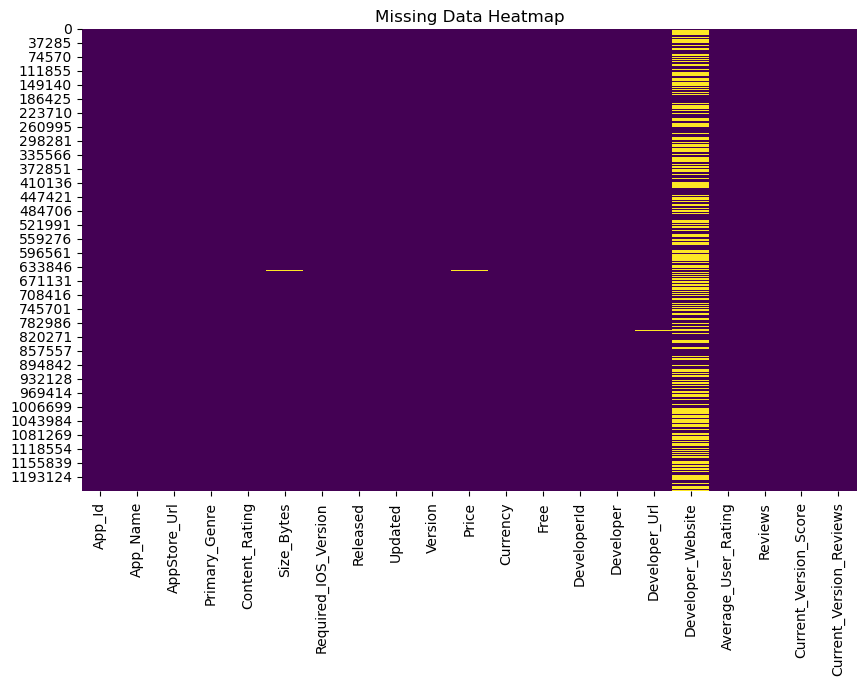

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

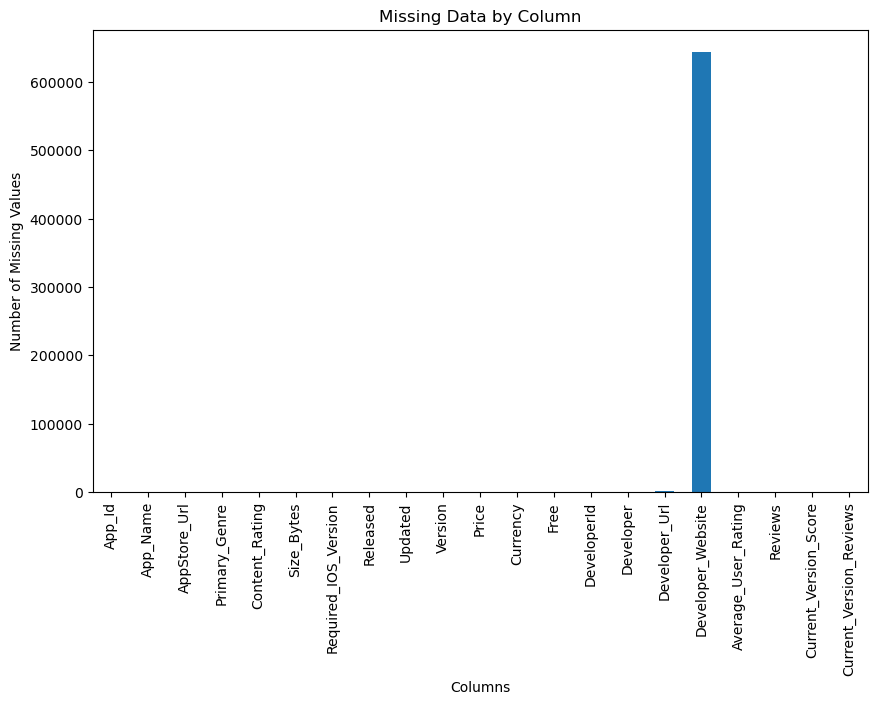

In [28]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar')
plt.title('Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [29]:
missing_counts = df.isnull().sum()
log_missing_counts = np.log1p(missing_counts)

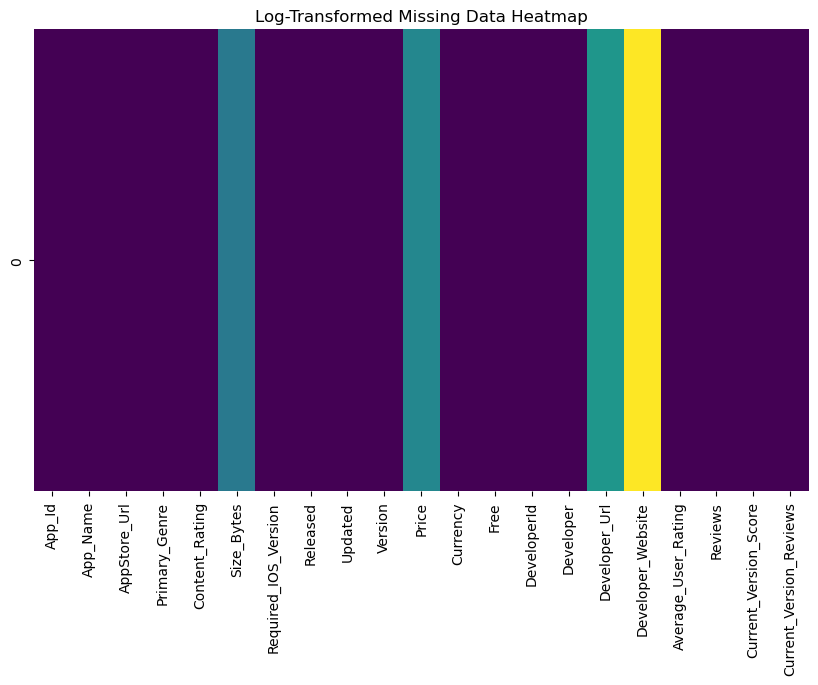

In [30]:
# Create a heatmap to visualize the log-transformed missing values
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(log_missing_counts).T, cbar=False, cmap='viridis')
plt.title('Log-Transformed Missing Data Heatmap')
plt.show() 

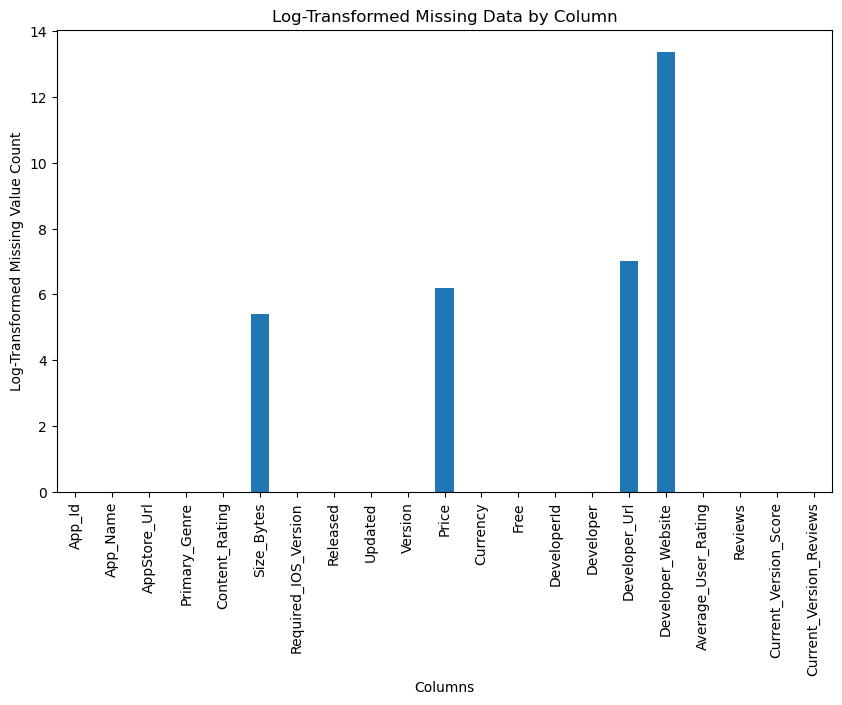

In [31]:
plt.figure(figsize=(10, 6))
log_missing_counts.plot(kind='bar')
plt.title('Log-Transformed Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Log-Transformed Missing Value Count')
plt.show()

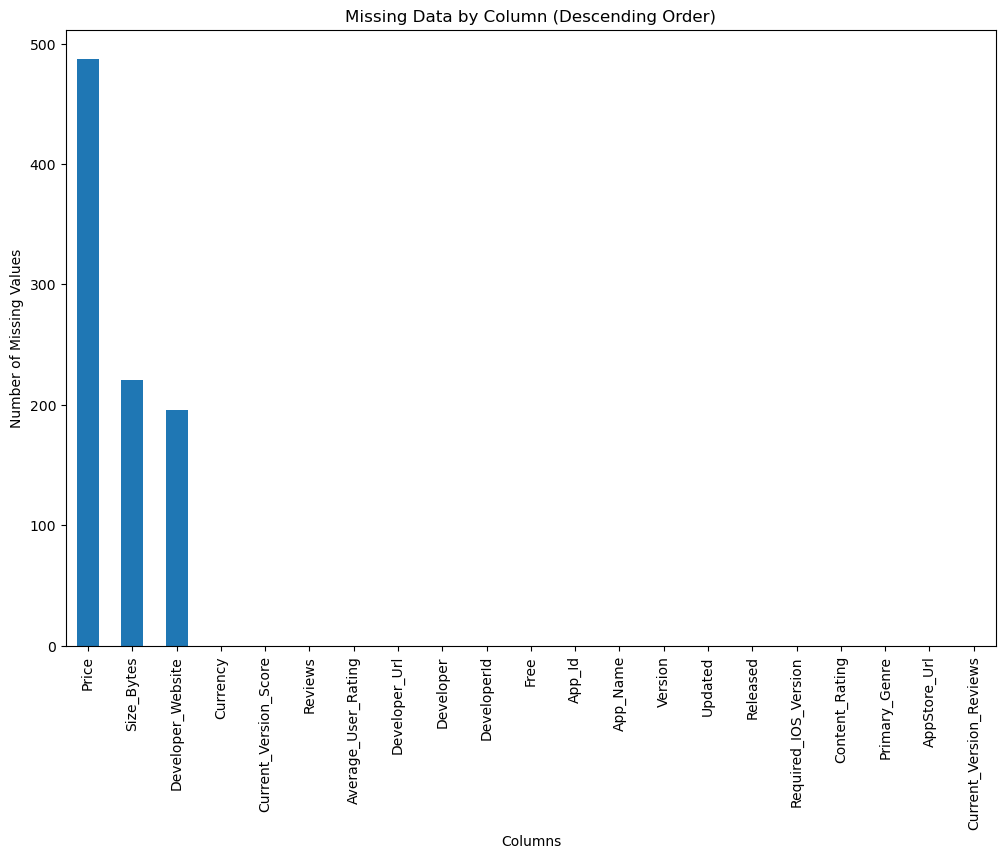

In [32]:
# Sort the missing values counts in descending order
sorted_missing_counts = missing_data.isnull().sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sorted_missing_counts.plot(kind='bar')
plt.title('Missing Data by Column (Descending Order)')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [33]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [34]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.00,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [35]:
price_mean_by_genre = df.groupby('Primary_Genre')['Price'].mean().sort_values(ascending=False)
price_mean_by_genre

Primary_Genre
Graphics & Design         6.982309
Developer Tools           4.807427
Music                     1.505414
Medical                   1.388844
Reference                 1.297108
Photo & Video             1.238679
Education                 0.981684
Stickers                  0.918461
Navigation                0.900588
Productivity              0.888851
Weather                   0.666298
Book                      0.625991
Utilities                 0.585330
Sports                    0.528561
Business                  0.368580
Entertainment             0.288484
Health & Fitness          0.278705
Games                     0.277227
Travel                    0.270790
Finance                   0.237173
Lifestyle                 0.160620
Social Networking         0.119589
News                      0.064469
Food & Drink              0.039276
Shopping                  0.016119
Magazines & Newspapers    0.012305
Name: Price, dtype: float64

In [36]:
missing_price_by_genre = df.groupby('Primary_Genre')['Price'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)
missing_price_by_genre

Primary_Genre
Games                     418
Entertainment              17
Social Networking           9
Health & Fitness            7
Education                   6
Productivity                5
Utilities                   4
Photo & Video               4
Music                       3
Lifestyle                   3
Finance                     3
Food & Drink                2
Shopping                    2
Graphics & Design           1
Medical                     1
Business                    1
Reference                   1
Travel                      0
Stickers                    0
Sports                      0
Book                        0
News                        0
Navigation                  0
Magazines & Newspapers      0
Developer Tools             0
Weather                     0
Name: Price, dtype: int64

In [37]:
df['Price'].mean()

0.5041267923423732

In [38]:
genre_counts = df['Primary_Genre'].value_counts()
genre_counts


Games                     193746
Business                  128297
Education                 119174
Utilities                  94007
Lifestyle                  84565
Food & Drink               73157
Health & Fitness           60724
Productivity               59430
Entertainment              53147
Shopping                   49537
Finance                    44984
Travel                     43726
Sports                     31455
Music                      29898
Medical                    27995
Photo & Video              25957
Social Networking          25429
News                       20422
Reference                  18615
Navigation                 12636
Stickers                   12407
Book                       11472
Weather                     3563
Graphics & Design           2781
Developer Tools             1951
Magazines & Newspapers      1297
Name: Primary_Genre, dtype: int64

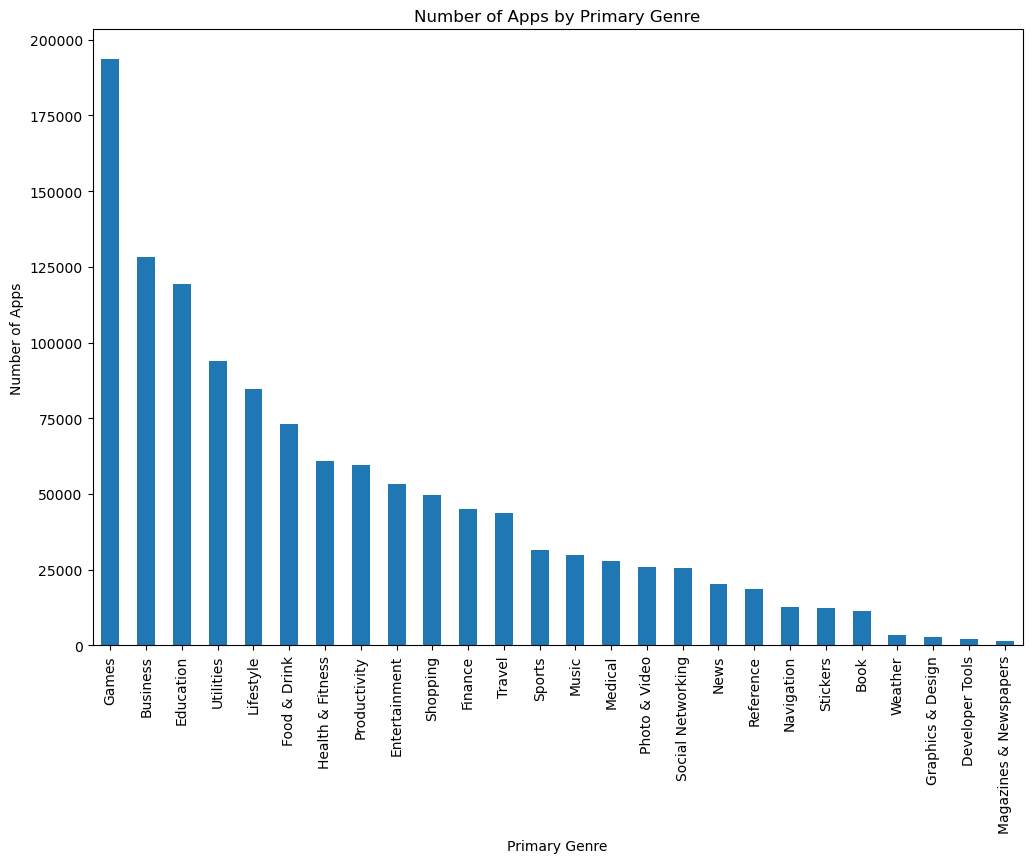

In [39]:
# Create a bar plot
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Number of Apps by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

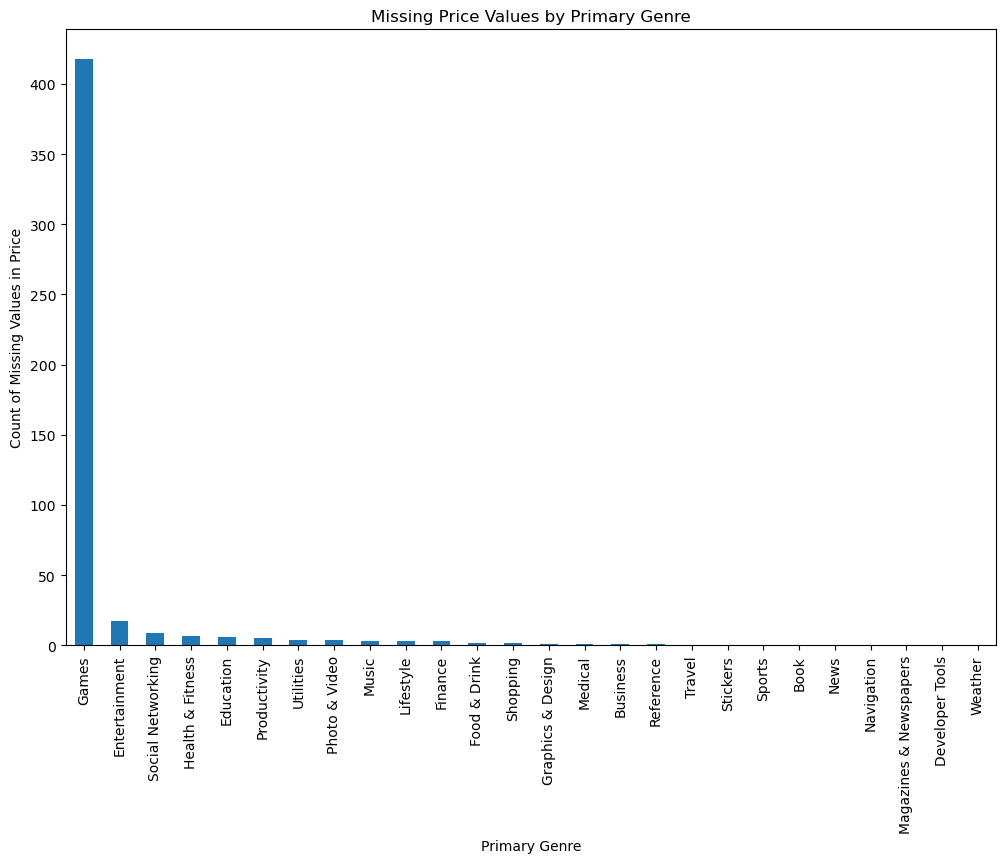

In [40]:
# Create a bar plot
plt.figure(figsize=(12, 8))
missing_price_by_genre.plot(kind='bar')
plt.title('Missing Price Values by Primary Genre')
plt.xlabel('Primary Genre')
plt.ylabel('Count of Missing Values in Price')
plt.xticks(rotation=90)
plt.show()

In [41]:
missing_price_by_genre.head()

Primary_Genre
Games                418
Entertainment         17
Social Networking      9
Health & Fitness       7
Education              6
Name: Price, dtype: int64

In [42]:
missing_price_by_genre2 = df.groupby('Primary_Genre')['Price']
missing_price_by_genre2.head()

0        0.00
1        0.00
2        0.00
3        2.99
4        0.00
         ... 
17276    0.00
20487    0.00
25106    0.00
26661    9.99
32024    9.99
Name: Price, Length: 130, dtype: float64

In [43]:
df.groupby('Primary_Genre')['Price'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

Primary_Genre
Games                     418
Entertainment              17
Social Networking           9
Health & Fitness            7
Education                   6
Productivity                5
Utilities                   4
Photo & Video               4
Music                       3
Lifestyle                   3
Finance                     3
Food & Drink                2
Shopping                    2
Graphics & Design           1
Medical                     1
Business                    1
Reference                   1
Travel                      0
Stickers                    0
Sports                      0
Book                        0
News                        0
Navigation                  0
Magazines & Newspapers      0
Developer Tools             0
Weather                     0
Name: Price, dtype: int64

In [44]:
df.isnull().sum().sort_values(ascending=False)

Developer_Website          643987
Developer_Url                1109
Price                         487
Size_Bytes                    221
Currency                        0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
Free                            0
App_Id                          0
App_Name                        0
Version                         0
Updated                         0
Released                        0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

In [45]:
import sklearn as sk

In [46]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.00,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [47]:
df["Free"].isnull().sum()

0

In [48]:
df.groupby('Free')['Price'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

Free
False    487
True       0
Name: Price, dtype: int64

In [49]:
df.groupby('Primary_Genre')['Price'].mean().sort_values(ascending=False)

Primary_Genre
Graphics & Design         6.982309
Developer Tools           4.807427
Music                     1.505414
Medical                   1.388844
Reference                 1.297108
Photo & Video             1.238679
Education                 0.981684
Stickers                  0.918461
Navigation                0.900588
Productivity              0.888851
Weather                   0.666298
Book                      0.625991
Utilities                 0.585330
Sports                    0.528561
Business                  0.368580
Entertainment             0.288484
Health & Fitness          0.278705
Games                     0.277227
Travel                    0.270790
Finance                   0.237173
Lifestyle                 0.160620
Social Networking         0.119589
News                      0.064469
Food & Drink              0.039276
Shopping                  0.016119
Magazines & Newspapers    0.012305
Name: Price, dtype: float64

In [50]:
df.groupby('Primary_Genre')['Free'].value_counts()

Primary_Genre           Free 
Book                    True       9909
                        False      1563
Business                True     125535
                        False      2762
Developer Tools         True       1180
                        False       771
Education               True     101799
                        False     17375
Entertainment           True      49048
                        False      4099
Finance                 True      43407
                        False      1577
Food & Drink            True      72275
                        False       882
Games                   True     177409
                        False     16337
Graphics & Design       True       1662
                        False      1119
Health & Fitness        True      57331
                        False      3393
Lifestyle               True      81295
                        False      3270
Magazines & Newspapers  True       1293
                        False         4
Medical   

In [51]:
df[(df['Primary_Genre'] == 'Games') & (df['Free'] == False)]['Price'].mean()

3.366782461209875

In [53]:
# Calculate the mean price for each 'Primary_Genre' and 'Free' status
mean_prices = df.groupby(['Primary_Genre', 'Free'])['Price'].mean() #.reset_index()

# Fill missing prices based on the calculated mean prices
# for index, row in mean_prices.iterrows():
#     primary_genre = row['Primary_Genre']
#     free_status = row['Free']
#     mean_price = row['Price']

#     # Update missing prices with the calculated mean price
#     df.loc[(df['Primary_Genre'] == primary_genre) & (df['Free'] == free_status) & df['Price'].isnull(), 'Price'] = mean_price

In [55]:
mean_prices.sort_values(ascending=False)

Primary_Genre           Free 
Graphics & Design       False    17.362093
Business                False    17.126907
Medical                 False    15.740607
Developer Tools         False    12.165097
Productivity            False     8.801865
Music                   False     8.390075
Navigation              False     7.501536
Reference               False     7.179414
Sports                  False     6.895848
Finance                 False     6.777802
Education               False     6.735293
Photo & Video           False     6.618783
Utilities               False     5.661365
News                    False     5.440413
Health & Fitness        False     4.997679
Book                    False     4.594607
Lifestyle               False     4.157432
Magazines & Newspapers  False     3.990000
Weather                 False     3.969933
Social Networking       False     3.781045
Entertainment           False     3.754821
Travel                  False     3.540837
Games                   

In [56]:
df.isnull().sum().sort_values(ascending=False)

Developer_Website          643987
Developer_Url                1109
Price                         487
Size_Bytes                    221
Currency                        0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
Free                            0
App_Id                          0
App_Name                        0
Version                         0
Updated                         0
Released                        0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

In [58]:
df.groupby(['Primary_Genre', 'Price'])['Size_Bytes'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

Primary_Genre  Price 
Book           0.00      0
Photo & Video  24.99     0
               31.99     0
               30.99     0
               29.99     0
                        ..
Games          109.99    0
               99.99     0
               94.99     0
               89.99     0
Weather        99.99     0
Name: Size_Bytes, Length: 1245, dtype: int64

In [59]:
df.groupby('Primary_Genre')[['Price', 'Size_Bytes']].apply(lambda x: x.isnull().sum())#.reset_index()

,Price,Size_Bytes
Primary_Genre,,
Book,0,0
Business,1,0
Developer Tools,0,0
Education,6,0
Entertainment,17,2
Finance,3,0
Food & Drink,2,0
Games,418,218
Graphics & Design,1,0


In [60]:
df['Developer'].value_counts()

ChowNow                       3966
Touch2Success                 1649
Alexander Velimirovic         1506
MINDBODY, Incorporated        1247
Phorest                       1131
                              ... 
DZ BANK AG                       1
Alpha Mortgage Corporation       1
RE/MAX Alliance Colorado         1
ALE SOLUTIONS, INC.              1
Luu Minh                         1
Name: Developer, Length: 505255, dtype: int64

In [64]:
df.groupby('Developer')['Price', 'Size_Bytes'].apply(lambda x: x.isnull().sum()).value_counts() #.sort_values(by = "Developer", ascending=False)

,Price,Size_Bytes
Developer,,
"""3S"", Joint Stock Company",0,0
"""Amigoo""",0,0
"""DSBC Financial Europe"" UAB",0,0
"""Die Presse"" Digital GmbH & Co KG",0,0
"""FloodLAMP Biotechnologies""",0,0
...,...,...
﻿Veterinary Business Development Ltd,0,0
"﻿﻿Barry Electric Cooperative, Inc",0,0
﻿﻿Ouachita Electric Cooperative Corporation,0,0


In [84]:
#df.groupby(df['Primary_Genre', 'Developer'])[['Price', 'Size_Bytes']].apply(lambda x: x.isnull().sum()).sort_values(by = "Price", ascending=False)#.value_counts())#.sort_values(by = "Developer", ascending=False)
df_null_grp =df.groupby(['Primary_Genre', 'Developer'])[['Price', 'Size_Bytes', 'Developer_Url', 'Developer_Website']].apply(lambda x: x.isnull().sum()).sort_values(by="Price", ascending=False)

In [85]:
df_null_grp.head(20)

Price  Size_Bytes  \
Primary_Genre Developer                                            
Games         Usama Ahmad Butt                    11           0   
              Sajjad Raza                          9           0   
              Tamoor Qamar                         8           4   
              Muhammad Ahmad Shabbir               8           0   
              Devolver                             7           7   
              Muhammad Akram                       7           0   
              Muhammad Irfan                       6           0   
              Noodlecake                           6           6   
              Muhammad Saleem                      5           0   
              Zach Gage                            5           5   
              Sunstar Technology Group LLC         5           0   
              BANDAI NAMCO Entertainment Inc.      4           2   
              ustwo games                          4           4   
              Shifty Eye                           4           4   
              Fahad Mahmood                        4           1   
              Rogue Games                          4           4   
              Muhammad Ali                         4           0   
              Gameloft                             3           3   
Entertainment Mohammed Belokda                     3           0   
Games         Snowman                              3           3   

                                               Developer_Url  \
Primary_Genre Developer                                        
Games         Usama Ahmad Butt                             0   
              Sajjad Raza                                  0   
              Tamoor Qamar                                 0   
              Muhammad Ahmad Shabbir                       0   
              Devolver                                     0   
              Muhammad Akram                               0   
              Muhammad Irfan                               0   
              Noodlecake                                   0   
              Muhammad Saleem                              0   
              Zach Gage                                    0   
              Sunstar Technology Group LLC                 0   
              BANDAI NAMCO Entertainment Inc.              0   
              ustwo games                                  0   
              Shifty Eye                                   0   
              Fahad Mahmood                                0   
              Rogue Games                                  0   
              Muhammad Ali                                 0   
              Gameloft                                     0   
Entertainment Mohammed Belokda                             0   
Games         Snowman                                      0   

                                               Developer_Website  
Primary_Genre Developer                                           
Games         Usama Ahmad Butt                                11  
              Sajjad Raza                                      9  
              Tamoor Qamar                                     6  
              Muhammad Ahmad Shabbir                           8  
              Devolver                                         3  
              Muhammad Akram                                   9  
              Muhammad Irfan                                   8  
              Noodlecake                                       4  
              Muhammad Saleem                                  3  
              Zach Gage                                        0  
              Sunstar Technology Group LLC                    36  
              BANDAI NAMCO Entertainment Inc.                 11  
              ustwo games                                      6  
              Shifty Eye                                       0  
              Fahad Mahmood                                    7  
  

In [92]:
df_null_grp.shape

(662132, 4)

In [94]:
df_null_grp.value_counts().sum()

662132

In [101]:
df_null_grp['Price'].value_counts()

0     661790
1        276
2         37
3         12
4          6
5          3
8          2
7          2
6          2
11         1
9          1
Name: Price, dtype: int64

In [103]:
df['Developer_Website'].isnull().sum()

643987